# Определение перспективного тарифа для телеком компании

Данный проект - учебный, выполнен в рамках прохождения курса "Аналитик данных" на Яндекс.Практикуме. Все датасеты были предоставлены авторами курса и являются интеллектуальной собственностью.

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов

### Тариф «Смарт»
Ежемесячная плата: 550 рублей

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

### Тариф «Ультра»
Ежемесячная плата: 1950 рублей

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

## План выполнения проекта

[Шаг 1. Открытие файла с данными и изучение общей информации](#step1)

[Шаг 2. Подготовка данных](#step2)

[Шаг 3. Анализ данных](#step3)

[Шаг 4. Проверка гипотез](#step4)

[Шаг 5. Общий вывод](#step5)

## <a id="step1">Шаг 1. Открытие файла с данными и изучение общей информации </a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
calls = pd.read_csv('datasets/calls.csv')
calls.sample(3)

,id,call_date,duration,user_id
1943,1005_540,2018-10-01,5.80,1005
18771,1051_160,2018-07-21,3.11,1051
10673,1027_543,2018-04-19,8.60,1027


In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В таблице со звонками 202607 строк, 4 столбца, пропусков нет. Из этой таблицы мы можем извлечь id юзера, дату звонка и его длительность. Столбцы id и user_id частично дублируют друг друга, т.к. id - это индификатор звонка, а user_id - индификатор пользователя.

In [4]:
internet = pd.read_csv('datasets/internet.csv')
internet.sample(3)

,Unnamed: 0,id,mb_used,session_date,user_id
72969,72969,1247_7,224.42,2018-06-30,1247
95285,95285,1321_549,411.53,2018-07-17,1321
110274,110274,1374_485,805.34,2018-07-03,1374


In [5]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В отражающей интернет трафик таблице 149396 строк, 5 столбцов, пропусков нет. Из этой таблицы мы можем извлечь id юзера, дату, когда юзер пользовался интернетом и количество мегабайт, которые он потратил. Нулевой столбец дублирует индексы строк.

In [6]:
messages = pd.read_csv('datasets/messages.csv')
messages.sample(3)

,id,message_date,user_id
26291,1110_156,2018-12-21,1110
31615,1142_134,2018-04-13,1142
66238,1282_670,2018-12-05,1282


In [7]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице с сообщениями 123036 строк, 3 столбца, пропусков также нет. В нашем распоряжении id юзера и дата отправки сообщения. 

In [8]:
tariffs = pd.read_csv('datasets/tariffs.csv')
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
users = pd.read_csv('datasets/users.csv')
users.sample(3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
287,1287,39,NaN,Севастополь,Вениамин,Мишин,2018-09-23,smart
194,1194,70,NaN,Москва,Егор,Наумов,2018-12-03,smart
42,1042,42,NaN,Хабаровск,Константин,Добрынин,2018-11-25,smart


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Также у нас есть небольшая таблица с данными пользователей. В ней всего 500 строк, 8 столбцов с данными об имени, возрасте, месте проживания, дате подключения и тарифе. Пропуски есть только в столбце с датой прекращения пользования тарифом, т.к. у многих юзеров данные тарифы ещё активны. Эти пропуски можно проигнорировать.

## <a id="step2">Шаг 2. Подготовка данных </a>

In [11]:
#заменим тип данных на дату в столбцах с датами и добавим новые столбцы с месецами
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

### Звонки

Я долго думала что делать со звонками длительностью 0 минут. Удалять их нельзя, ведь это почти 20% нашего датасета. Заказав выписку у мобильного оператора по своему своему номеру и поизучав при каком условии туда попадают звонки, я пришла к выводу, что недозвонов в этой таблице нет. Мой оператор правда сразу все исходящие звонки, где была снята трубка на другом конце автоматом округляет, поэтому значений меньше нуля нет вовсе, всё просто в минутах. В случае нашего датасета я решила все же предположить, что нулевые звонки, это звонки, которые длились меньше минуты. То есть счетчик секунд включался по истичении перовой минуты. А это значит, что ко всем звонкам датасета следует добавить единицу. Такая теория особенно имеет смысл, если в реальном мире в тарифе, по которому создавался этот датасет, первая минута шла в подарок. Были раньше такие тарифы, я помню) В любом случае добавление лишней минуты не сильно скажется на результатах исследования.

In [12]:
calls['duration'] = calls['duration'] + 1

In [13]:
#округлим время разговоров до минут, согласно тарифу в большую сторону
calls['minutes_spent'] = np.ceil(calls['duration']).astype('int')
#мегабайты тоже округлим, пока не забыли про них
internet['mb_spent'] = np.ceil(internet['mb_used']).astype('int')

In [14]:
#посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам
calls_minutes = calls.pivot_table(index = ('user_id', 'month'), values = ('id', 'minutes_spent'), aggfunc= {'id': 'count', 'minutes_spent': 'sum'})
calls_minutes['index'] = calls_minutes.index
#превратим двойной индекс в столбцы user_id и month, для того, чтобы потом по ним объединять таблицы
calls_minutes[['user_id', 'month']] = pd.DataFrame(calls_minutes['index'].tolist(), index=calls_minutes.index)

In [15]:
#объеденим таблицы юзеров и звонков
user_calls = users.join(calls_minutes.set_index('user_id'), on = 'user_id')

In [16]:
#добавим столбец с включенными в тариф минутами минутами
def minutes_included(data):
    if data['tariff'] == 'ultra':
        return 3000
    elif data['tariff'] == 'smart':
        return 500    
user_calls['minutes_included'] = user_calls.apply(minutes_included, axis=1)       

In [17]:
#добавим столбец с ценой за минуту
def rub_per_minute_or_message(data):
    if data['tariff'] == 'ultra':
        return 1
    elif data['tariff'] == 'smart':
        return 3   
user_calls['rub_per_minute'] = user_calls.apply(rub_per_minute_or_message, axis=1)

In [18]:
#вычислим помесячную выручку с каждого пользователя по звонкам
user_calls['spent_on_calls'] = (user_calls['minutes_spent'] - user_calls['minutes_included']) * user_calls['rub_per_minute']

In [19]:
#заменим отрицательные значения на нулевые, т.к. оператор ничего не заработал 
user_calls['spent_on_calls'] = user_calls['spent_on_calls'].where(user_calls['spent_on_calls'] >= 0, 0)

### Сообщения

In [20]:
#посчитаем для каждого пользователя количество отправленных сообщений по месяцам
messages_count = messages.pivot_table(index = ('user_id', 'month'), values = 'id', aggfunc = 'count')
messages_count.rename(columns={'id':'messages_spent'}, inplace=True)
messages_count['index'] = messages_count.index
messages_count[['user_id', 'month']] = pd.DataFrame(messages_count['index'].tolist(), index=messages_count.index)

In [21]:
#объеденим таблицы юзеров и сообщений
user_messages = users.join(messages_count.set_index('user_id'), on = 'user_id')

In [22]:
#добавим столбец с включенными в тариф сообщениями
def messages_included(data):
    if data['tariff'] == 'ultra':
        return 1000
    elif data['tariff'] == 'smart':
        return 50   
user_messages['messages_included'] = user_messages.apply(messages_included, axis=1) 

In [23]:
#добавим столбец с ценой за сообщение 
user_messages['rub_per_message'] = user_messages.apply(rub_per_minute_or_message, axis=1)

In [24]:
#вычислим помесячную выручку с каждого пользователя по сообщениям
user_messages['spent_on_messages'] = (user_messages['messages_spent'] - user_messages['messages_included']) * user_messages['rub_per_message']
user_messages['spent_on_messages'] = user_messages['spent_on_messages'].where(user_messages['spent_on_messages'] >= 0, 0)

### Интернет

In [25]:
#посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам
traffic = internet.pivot_table(index = ('user_id', 'month'), values = 'mb_spent', aggfunc = 'sum')
traffic['index'] = traffic.index
traffic[['user_id', 'month']] = pd.DataFrame(traffic['index'].tolist(), index=traffic.index)

In [26]:
#объеденим таблицы юзеров и интернет_трафика
user_traffic = users.join(traffic.set_index('user_id'), on = 'user_id')

In [27]:
#добавим столбец с включенными в тариф мегабайтами
def mb_per_month_included(data):
    if data['tariff'] == 'ultra':
        return 30720
    elif data['tariff'] == 'smart':
        return 15360   
user_traffic['mb_per_month_included'] = user_traffic.apply(mb_per_month_included, axis=1) 

In [28]:
#добавим столбец с ценой за гигабит
def rub_per_gb(data):
    if data['tariff'] == 'ultra':
        return 150
    elif data['tariff'] == 'smart':
        return 200   
user_traffic['rub_per_gb'] = user_traffic.apply(rub_per_gb, axis=1)

In [29]:
#вычислим помесячную выручку с каждого пользователя по интернет-трафику
user_traffic['spent_on_traffic'] = np.ceil((user_traffic['mb_spent'] - user_traffic['mb_per_month_included']) / 1000) * user_traffic['rub_per_gb']
user_traffic['spent_on_traffic'] = user_traffic['spent_on_traffic'].where(user_traffic['spent_on_traffic'] >= 0, 0)

### Сведение статистик в одну таблицу

In [30]:
calls_and_messages = pd.merge(user_calls, user_messages, 'outer', on = ['user_id', 'month'])

In [31]:
#создадим таблицу, которая будет отражать, сколько потратили пользователи на разные услуги
user_spent = pd.merge(calls_and_messages, user_traffic, on = ['user_id', 'month'], how = 'outer')

In [32]:
#добавим столбец с абонентской платой
def rub_monthly_fee(data):
    if data['tariff'] == 'ultra':
        return 1950
    elif data['tariff'] == 'smart':
        return 550   
user_spent['rub_monthly_fee'] = user_spent.apply(rub_monthly_fee, axis=1)

In [33]:
#проверим попали ли в нашу таблицу юзеры, которые и не звонили, и не писали сообщений и не пользовались интернетом.
user_spent[user_spent['spent_on_calls'].isnull() & user_spent['spent_on_messages'].isnull() & user_spent['spent_on_traffic'].isnull()].shape[0]

0

Раз таких пользователей нет, то можно заменить отсутсвующие значения на нули, потому что бывают пользователи, которые только звонят, или только пользуются интернетом. Раз они совершили, хоть какую-то активность, значит сим-карта активна. 

In [34]:
user_spent['spent_on_calls'] = user_spent['spent_on_calls'].fillna(0)
user_spent['spent_on_messages'] = user_spent['spent_on_messages'].fillna(0)
user_spent['spent_on_traffic'] = user_spent['spent_on_traffic'].fillna(0)

In [35]:
#добавим столбец, в котором посчитаем сколько всего заплатил ползователь оператору за каждый месяц
user_spent['total'] = user_spent['spent_on_calls'] + user_spent['spent_on_messages'] + user_spent['spent_on_traffic'] + user_spent['rub_monthly_fee']

In [36]:
#уберем из нашей таблицы лишние столбцы и строки, приведем к целочислительному типу
monthly_revenue = user_spent[['user_id', 'month', 'total', 'spent_on_calls', 'spent_on_messages', 'spent_on_traffic', 'rub_monthly_fee', 'city', 'tariff']].dropna()
monthly_revenue[['user_id', 'month', 'total', 'spent_on_calls', 'spent_on_messages', 'spent_on_traffic', 'rub_monthly_fee']] = monthly_revenue[['user_id', 'month', 'total', 'spent_on_calls', 'spent_on_messages', 'spent_on_traffic', 'rub_monthly_fee']].astype('int')

In [37]:
#посмотрим, что получилось
monthly_revenue

,user_id,month,total,spent_on_calls,spent_on_messages,spent_on_traffic,rub_monthly_fee,city,tariff
0,1000,5,1950,0,0,0,1950,Краснодар,ultra
1,1000,6,1950,0,0,0,1950,Краснодар,ultra
2,1000,7,1950,0,0,0,1950,Краснодар,ultra
3,1000,8,1950,0,0,0,1950,Краснодар,ultra
4,1000,9,1950,0,0,0,1950,Краснодар,ultra
...,...,...,...,...,...,...,...,...,...
3288,1489,9,950,0,0,400,550,Санкт-Петербург,smart
3289,1489,10,1550,0,0,1000,550,Санкт-Петербург,smart
3290,1489,11,1150,0,0,600,550,Санкт-Петербург,smart
3291,1489,12,950,0,0,400,550,Санкт-Петербург,smart


## <a id="step3">Шаг 3. Анализ данных </a>

### Таблица средних количеств, дисперсий и стандартных отклонений

In [38]:
stat_table = user_spent.pivot_table(index = 'tariff', values = ('minutes_spent', 'messages_spent', 'mb_spent', 'total'), aggfunc = ('mean', 'var', 'std')).astype('int')
stat_table

mb_spent                 messages_spent           minutes_spent       \
           mean   std       var           mean std   var          mean  std   
tariff                                                                        
smart     16236  5868  34443100             38  26   717           477  214   
ultra     19686  9952  99043439             61  46  2119           625  348   

               total               
           var  mean  std     var  
tariff                             
smart    45928  1405  886  785021  
ultra   121446  2074  386  149656

Средние, дисперсии и стандартные отклонения отличаются довольно сильно, стоит учитывать это при проведении статистического теста

### Минуты, сообщения и интернет-трафик, которые требуются пользователям каждого тарифа в месяц

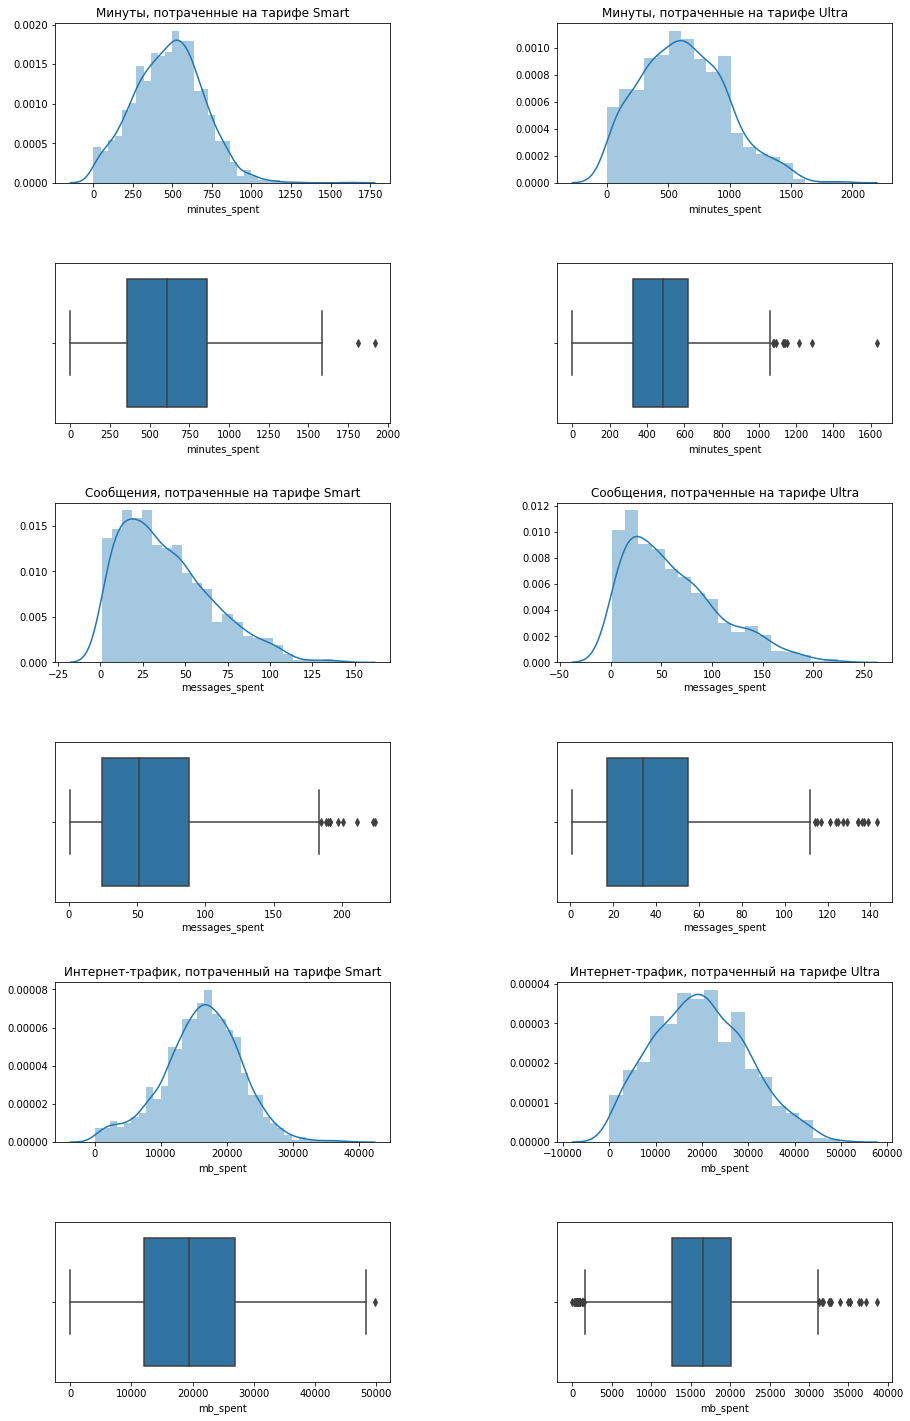

In [39]:
fig, ax = plt.subplots(nrows=6, ncols=2,  figsize = (15,25))
fig.subplots_adjust(wspace=0.5, hspace = 0.5)
sns.distplot(user_spent.query('tariff == "smart"')['minutes_spent'], ax=ax[0, 0]).set_title('Минуты, потраченные на тарифе Smart')
sns.distplot(user_spent.query('tariff == "ultra"')['minutes_spent'], ax=ax[0, 1]).set_title('Минуты, потраченные на тарифе Ultra')
sns.boxplot(user_spent.query('tariff == "ultra"')['minutes_spent'], ax=ax[1, 0])
sns.boxplot(user_spent.query('tariff == "smart"')['minutes_spent'], ax=ax[1, 1])
sns.distplot(user_spent.query('tariff == "smart"')['messages_spent'], ax=ax[2, 0]).set_title('Сообщения, потраченные на тарифе Smart')
sns.distplot(user_spent.query('tariff == "ultra"')['messages_spent'], ax=ax[2, 1]).set_title('Сообщения, потраченные на тарифе Ultra')
sns.boxplot(user_spent.query('tariff == "ultra"')['messages_spent'], ax=ax[3, 0])
sns.boxplot(user_spent.query('tariff == "smart"')['messages_spent'], ax=ax[3, 1])
sns.distplot(user_spent.query('tariff == "smart"')['mb_spent'], ax=ax[4, 0]).set_title('Интернет-трафик, потраченный на тарифе Smart')
sns.distplot(user_spent.query('tariff == "ultra"')['mb_spent'], ax=ax[4, 1]).set_title('Интернет-трафик, потраченный на тарифе Ultra')
sns.boxplot(user_spent.query('tariff == "ultra"')['mb_spent'], ax=ax[5, 0])
sns.boxplot(user_spent.query('tariff == "smart"')['mb_spent'], ax=ax[5, 1])
plt.show()

### Вывод

Данные распределены нормально. За лимит предоставленных минут, сообщений и мобильного трафика выходят только пользователи тарифа Smart. Абонетам тарифа Ultra хватает того, что предоставляется в пакете. Всего 134 человека пользовались интернетом на тарифе Ultra, больше, чем было включенно в цену.

Графики, отражающие сколько сообщений отправляют абоненты, скошены влево, т.к. в современном мире смс не самый популярный способ связи, ему на смену давно пришли мессенджеры. 

## <a id="step4">Шаг 4. Проверка гипотез </a>

### Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Нам нужно понять различается ли средняя выручка, приэтом было бы неправильно просто взять два средних значения и сравнить их, т.к. останется непонятным, является ли это различие статистически значимым. Поэтому воспользуемся для проверки этой гипотезы t-критерием Стьюдента. t-критерий Стьюдента применяется для сравнения средних значений двух независимых между собой выборок, при условии, что данные распределены нормально и данные не коррелируют между собой. 
- Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается
- Альтернативная гипотеза: средняя выручка всё же различается


In [40]:
monthly_revenue_ultra = monthly_revenue.query('tariff == "ultra"')
monthly_revenue_smart = monthly_revenue.query('tariff == "smart"')

In [41]:
monthly_revenue_tariff = st.ttest_ind(
    monthly_revenue_ultra['total'],
    monthly_revenue_smart['total'],
    equal_var = False) #т.к. дисперсии не равны
alpha = 0.05
print('p-value', monthly_revenue_tariff.pvalue)
if (monthly_revenue_tariff.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value 2.205287428395741e-171
Отвергаем нулевую гипотезу


Мы получили такое p значение, которое позволяет нам отвергнуть нулевую гипотезу и говорить о том, средняя месячная прибыль с каждого пользователя отличается в зависимости от тарифа.

### Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

- Нулевая гипотеза: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
- Альтернативная гипотеза: средняя прибыль в разных столице и в регионах будет разной

Воспользуемся также для проверки этой гипотезы t-критерием Стьюдента

In [42]:
monthly_revenue_moscow = monthly_revenue.query('city == "Москва"')
monthly_revenue_region = monthly_revenue.query('city != "Москва"')

In [43]:
monthly_revenue_city = st.ttest_ind(
    monthly_revenue_moscow['total'],
    monthly_revenue_region['total'],
    equal_var = False) #т.к. дисперсии не равны
alpha = 0.05
print('p-value', monthly_revenue_city.pvalue)
if (monthly_revenue_city.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value 0.8083917077666594
Не получилось отвергнуть нулевую гипотезу


p значение не позволяет нам отвергнуть нулевую гипотезу, а значит вне зависимости от того, в каком регионе живет человек, в среднем он приносит примерно одну и ту же прибыль мобильному оператору.

## <a id="step5">Шаг 5. Общий вывод </a>

Пранализировав предоставленные мобильным оператором данные можно сказать, что:
- Тариф Ultra приносит значительно больше денег, несмотря на то, что его пользователи реже выходят за свой лимит, а значит не платят за дополнительные услуги
- Москва не сильно отличается от регионов по уровню средней месячной выручки с абонента
    
Следует отметить, что условия данного проекта немного оторванны от реальности. Как минимум цены  и тарифные условия  отличаются в зависимости от региона. А цена на тариф Ultra неправдопадобно высокая. Возможно с более низкой ценой на этот тариф, получились бы другие результаты.

Однако, анализ проведен, и из него следует, что деньги необходимо вкладывать в рекламу тарифа Ultra по всей стране. 